# Topic Modeling: Round 1

In [46]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from random import randint

/Users/sunnajo/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
# Import module
from topic_modeling import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import nltk
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim
from gensim import matutils, models
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models.nmf import Nmf
import scipy.sparse
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, NMF, PCA
import operator
from sklearn.metrics.pairwise import cosine_similarity

In [51]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Loading and preparing data

In [27]:
# Load preprocessed text (nouns only)
import pickle

infile = open('processed_text.pkl','rb')
text_l = pickle.load(infile)
infile.close()

In [28]:
# Define min_df and max_df
min_df = 31
max_df = 6200

In [29]:
# Load list of PMIDs to use as abstract labels
infile = open('pmids.pkl','rb')
pmids = pickle.load(infile)
infile.close()

In [30]:
text_l = prep_text(text_l)
len(text_l)

42977

### Creating DTM

In [31]:
# Count vectorizer
cv, dtm_cv = vectorize_dtm('count', text_l, pmids, min_df, max_df)
dtm_cv.shape

(42977, 3146)

In [32]:
# TFIDF vectorizer
tfidf, dtm_tfidf = vectorize_dtm('tfidf', text_l, pmids, min_df, max_df)
dtm_tfidf.shape

(42977, 3146)

## Trying different topic modeling models/methods

### LDA

Iterations:
- LDA with gensim: used bag-of-words model in order to create id2word dictionary, want to calculate coherence score
- LDA with sklearn

### LDA - Gensim

Iteration 1:
- Bag-of-words
- Parameters: [num_topics=10, random_state=0, passes=10, update_every=1, chunksize=100, alpha='auto', per_word_topics=True]
- Coherence score: ~0.49

Iteration 2:
- Bag-of-words
- Parameters: [num_topics=20, random_state=0, passes=10, update_every=1, chunksize=100, alpha='auto', per_word_topics=True]
- Coherence score: ~0.469

Iteration 3:
- Bag-of-words
- Parameters: [num_topics=15, random_state=0, passes=10, update_every=1, chunksize=100, alpha='auto', per_word_topics=True]
- Coherence score: ~0.426

Iteration 4:
- Bag-of-words
- Parameters: [num_topics=12, random_state=0, passes=10, update_every=1, chunksize=100, alpha='auto', per_word_topics=True]
- Coherence score: ~0.474

Iteration 5: on grammed text
- Bag-of-words
- Parameters: [num_topics=10, random_state=0, passes=10, update_every=1, chunksize=100, alpha='auto', per_word_topics=True]
- Coherence score: ~0.47

Iteration 6: on grammed text
- Bag-of-words
- Parameters: [num_topics=15, random_state=0, passes=10, update_every=1, chunksize=100, alpha='auto', per_word_topics=True]
- Coherence score: ~0.43

Iteration 6: on grammed text
- Bag-of-words
- Parameters: [num_topics=8, random_state=0, passes=10, update_every=1, chunksize=100, alpha='auto', per_word_topics=True]
- Coherence score: ~0.51 (but poor distribution of topics on viz)

Iteration 7: on grammed text
- Bag-of-words
- Parameters: [num_topics=20, random_state=0, passes=10, update_every=1, chunksize=100, alpha='auto', per_word_topics=True]
- Coherence score: ~0.39

In [33]:
lda_model, corpus, id2word = gensim_lda(text_l, num_topics=15)

In [23]:
# Look at topics
lda_model.print_topics()

[(0,
  '0.340*"pneumonia" + 0.137*"stage" + 0.061*"face" + 0.030*"limitation" + 0.030*"solution" + 0.025*"consultation" + 0.025*"culture" + 0.024*"shortage" + 0.021*"food" + 0.020*"aerosol"'),
 (1,
  '0.121*"respiratory" + 0.106*"risk" + 0.049*"death" + 0.039*"mortality" + 0.035*"laboratory" + 0.034*"population" + 0.024*"condition" + 0.023*"outcome" + 0.022*"severity" + 0.021*"history"'),
 (2,
  '0.170*"activity" + 0.079*"survey" + 0.074*"resident" + 0.055*"stress" + 0.036*"physician" + 0.033*"document" + 0.031*"training" + 0.030*"respondent" + 0.029*"screening" + 0.027*"item"'),
 (3,
  '0.099*"score" + 0.080*"distress" + 0.072*"anxiety" + 0.059*"duration" + 0.049*"disorder" + 0.042*"scale" + 0.041*"questionnaire" + 0.038*"male" + 0.034*"depression" + 0.028*"rehabilitation"'),
 (4,
  '0.107*"staff" + 0.101*"worker" + 0.079*"surgery" + 0.061*"equipment" + 0.060*"incidence" + 0.056*"capacity" + 0.045*"phase" + 0.042*"prevent" + 0.038*"program" + 0.036*"safety"'),
 (5,
  '0.167*"transmiss

Evaluating model:
- Perplexity
- Coherence score

In [25]:
lda_score(text_l, corpus, id2word, lda_model)


Perplexity:  -11.947351416575238

Coherence Score:  0.445838467838912


In [ ]:
# Calculate coherence scores for different numbers of topics
model_list, coherence_values = compute_coherence_values(texts=text_l, dictionary=id2word, corpus=corpus, start=2, limit=40, step=6)

# Plot
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score");

### LDA - sklearn

*Used CountVectorizer since TFIDF is built in?*

Iteration 1:
- Vectorizer parameters: min_df=0.01, max_df=0.4
- LDA model parameters: n_components=10
- vis: most of circles are overlapping

Iteration 2:
- Vectorizer parameters: min_df=15, max_df=0.2
- LDA model parameters: n_components=15
- vis: most of circles are overlapping and close together

Iteration 3:
- Vectorizer parameters: min_df=0.01, max_df=0.25
- LDA model parameters: n_components=10
- vis: circles are more spread out but some are completely overlapping

Iteration 4:
- Vectorizer parameters: min_df=50, max_df=0.2
- LDA model parameters: n_components=10
- vis: circles are more spread out but some are completely overlapping

In [36]:
# Count vectorizer
lda_cv, lda_topic_matrix_cv = sklearn_lda(dtm_cv, n_components=15)

/Users/sunnajo/anaconda3/envs/metis/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [37]:
# Get topics: CV
sklearn_lda_topics(lda_cv, cv)

Top 15 words for Topic #0
['protocol', 'outcome', 'quality', 'support', 'scale', 'safety', 'nurse', 'hydroxychloroquine', 'efficacy', 'distress', 'intervention', 'score', 'depression', 'anxiety', 'trial']


Top 15 words for Topic #1
['transmission', 'scenario', 'distancing', 'policy', 'strategy', 'government', 'adult', 'spread', 'community', 'state', 'world', 'death', 'population', 'child', 'country']


Top 15 words for Topic #2
['variable', 'attitude', 'pattern', 'subject', 'relationship', 'model', 'proportion', 'diabetes', 'odds', 'percentage', 'population', 'association', 'control', 'network', 'incidence']


Top 15 words for Topic #3
['activity', 'medication', 'problem', 'question', 'perception', 'food', 'questionnaire', 'information', 'concern', 'respondent', 'medium', 'behavior', 'stress', 'disorder', 'survey']


Top 15 words for Topic #4
['entry', 'lung', 'sequence', 'tissue', 'interaction', 'development', 'expression', 'gene', 'mechanism', 'inhibitor', 'target', 'host', 'recepto

In [38]:
# TFIDF vectorizer
lda_tfidf, lda_topic_matrix_tfidf = sklearn_lda(dtm_tfidf, n_components=15)

In [39]:
# Get topics: TFIDF
sklearn_lda_topics(lda_tfidf, tfidf)

Top 15 words for Topic #0
['multisystem', 'household', 'parent', 'wastewater', 'saliva', 'traveler', 'coagulation', 'seizure', 'family', 'pulmonary_embolism', 'anticoagulation', 'adolescent', 'thrombosis', 'adult', 'child']


Top 15 words for Topic #1
['aerosolization', 'resumption', 'equipment', 'dermatology', 'decontamination', 'immunization', 'protection', 'face', 'particle', 'pharmacist', 'pharmacy', 'aerosol', 'droplet', 'respirator', 'mask']


Top 15 words for Topic #2
['distress', 'ultrasound', 'oxygenation', 'proliferation', 'pressure', 'emission', 'mechanical_ventilation', 'failure', 'flow', 'intubation', 'ventilator', 'oxygen', 'link', 'ventilation', 'ards']


Top 15 words for Topic #3
['prospect', 'conversion', 'everyone', 'landscape', 'psychiatry', 'commentary', 'editorial', 'encephalitis', 'considers', 'career', 'confusion', 'nutrition', 'anesthesia', 'market', 'rehabilitation']


Top 15 words for Topic #4
['activity', 'compound', 'interaction', 'replication', 'entry', 'ge

### Visualize LDA

*Gensim model*

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [ ]:
pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

*sklearn model*

In [ ]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [ ]:
# Count vectorizer
pyLDAvis.sklearn.prepare(lda_cv, np.matrix(dtm_cv), cv)

In [ ]:
# TFIDF vectorizer
pyLDAvis.sklearn.prepare(lda_tfidf, np.matrix(dtm_tfidf), tfidf)

## PCA

In [65]:
# Count vectorizer
pca_cv = pca_model(cv, dtm_cv, n_components=15, abstract_labels=pmids)

In [66]:
# TFIDF vectorizer
pca_tfidf = pca_model(tfidf, dtm_tfidf, n_components=15, abstract_labels=pmids)

In [67]:
# Look at components/topics: CV
display_topics(pca_cv, cv.get_feature_names(), 15)


Topic  0
cell, expression, receptor, lung, host, vaccine, antibody, gene, target, entry, tissue, mechanism, inhibitor, replication, spike

Topic  1
mortality, death, outcome, model, admission, trial, cancer, population, cohort, country, severity, comorbidities, hospitalization, injury, association

Topic  2
model, country, transmission, cell, population, death, control, spread, contact, strategy, policy, world, prediction, community, distancing

Topic  3
trial, intervention, anxiety, control, vaccine, cell, protocol, survey, outcome, worker, randomization, safety, depression, design, support

Topic  4
anxiety, child, cell, cancer, depression, survey, population, student, stress, woman, adult, score, family, worker, questionnaire

Topic  5
cancer, surgery, management, country, model, recommendation, resource, emergency, cell, lung, guideline, strategy, challenge, delay, approach

Topic  6
child, cancer, transmission, country, adult, vaccine, contact, control, trial, family, parent, man

In [68]:
# Look at components: TFIDF
display_topics(pca_tfidf, tfidf.get_feature_names(), 15)


Topic  0
cell, receptor, antibody, host, expression, vaccine, lung, target, inhibitor, gene, entry, mechanism, injury, mortality, tissue

Topic  1
mortality, death, admission, outcome, cancer, injury, comorbidities, severity, cohort, hospitalization, mechanical_ventilation, hypertension, failure, pneumonia, laboratory

Topic  2
child, adult, anxiety, antibody, family, parent, adolescent, woman, school, depression, infant, multisystem, laboratory, course, pneumonia

Topic  3
cancer, child, surgery, cell, management, lung, recommendation, adult, guideline, anxiety, oncology, staff, surgeon, emergency, family

Topic  4
child, cancer, country, model, transmission, vaccine, death, world, spread, control, population, strategy, development, prevention, contact

Topic  5
antibody, detection, vaccine, assay, diagnosis, sensitivity, specificity, trial, serum, laboratory, pneumonia, specimen, development, titer, neutralization

Topic  6
antibody, model, cancer, anxiety, depression, detection, po

In [84]:
# Explained variance: CV
pca_cv.explained_variance_ratio_

array([0.01770616, 0.01584338, 0.01298665, 0.01222725, 0.01159397,
       0.01121301, 0.01040167, 0.01012347, 0.00878017, 0.00837474,
       0.00816206, 0.00760187, 0.00732808, 0.00710646, 0.00698762])

In [85]:
# Explained variance: TFIDF
pca_tfidf.explained_variance_ratio_

array([0.00901361, 0.00780657, 0.00668843, 0.00655823, 0.00596854,
       0.00563122, 0.00527257, 0.0052379 , 0.00473963, 0.00451238,
       0.00431167, 0.00415371, 0.00408087, 0.00386796, 0.00385413])

## LSA

In [88]:
# Count vectorizer
lsa_cv, lsa_twdf_cv, lsa_dtdf_cv = lsa_model(n_components=15, dtm=dtm_cv, vectorizer=cv, abstract_labels=pmids)

Explained variance:  [0.01076722 0.01770152 0.0149039  0.01277487 0.01177773 0.01124004
 0.0104397  0.01016761 0.00890842 0.0083736  0.00832739 0.00791943
 0.00745294 0.00715371 0.0069527 ]


In [89]:
# TFIDF vectorizer
lsa_tfidf, lsa_twdf_tfdif, lsa_dtdf_tfidf = lsa_model(n_components=15, dtm=dtm_cv, vectorizer=tfidf, abstract_labels=pmids)

Explained variance:  [0.01076722 0.01770152 0.0149039  0.01277487 0.01177773 0.01124004
 0.0104397  0.01016761 0.00890842 0.0083736  0.00832739 0.00791943
 0.00745294 0.00715371 0.0069527 ]


In [90]:
# Look at components/topics: CV
display_topics(lsa_cv, cv.get_feature_names(), 15)


Topic  0
mortality, model, death, country, cell, population, control, outcome, transmission, trial, strategy, intervention, management, world, cancer

Topic  1
cell, expression, receptor, lung, host, vaccine, antibody, gene, target, entry, tissue, mechanism, trial, inhibitor, replication

Topic  2
mortality, death, outcome, admission, cancer, cohort, trial, comorbidities, injury, severity, hospitalization, mechanical_ventilation, ratio, association, hypertension

Topic  3
model, country, transmission, death, population, spread, prediction, parameter, policy, world, dynamic, contact, estimate, cell, distancing

Topic  4
trial, model, vaccine, intervention, control, protocol, randomization, efficacy, safety, transmission, design, size, development, hydroxychloroquine, antibody

Topic  5
cancer, surgery, management, recommendation, country, emergency, resource, guideline, lung, challenge, strategy, model, approach, delay, world

Topic  6
child, transmission, cancer, country, vaccine, adu

In [91]:
# Look at components/topics: TFIDF
display_topics(lsa_tfidf, tfidf.get_feature_names(), 15)


Topic  0
mortality, model, death, country, cell, population, control, outcome, transmission, trial, strategy, intervention, management, world, cancer

Topic  1
cell, expression, receptor, lung, host, vaccine, antibody, gene, target, entry, tissue, mechanism, trial, inhibitor, replication

Topic  2
mortality, death, outcome, admission, cancer, cohort, trial, comorbidities, injury, severity, hospitalization, mechanical_ventilation, ratio, association, hypertension

Topic  3
model, country, transmission, death, population, spread, prediction, parameter, policy, world, dynamic, contact, estimate, cell, distancing

Topic  4
trial, model, vaccine, intervention, control, protocol, randomization, efficacy, safety, transmission, design, size, development, hydroxychloroquine, antibody

Topic  5
cancer, surgery, management, recommendation, country, emergency, resource, guideline, lung, challenge, strategy, model, approach, delay, world

Topic  6
child, transmission, cancer, country, vaccine, adu

## Corex

In [92]:
from corextopic import corextopic as ct
from corextopic import vis_topic as vt

In [95]:
# Build Corex model
words = list(np.array(tfidf.get_feature_names()))
topic_model = ct.Corex(n_hidden=5, words=words, seed=1)
topic_model.fit(dtm_tfidf, words=words, docs=text_l)

In [96]:
# Look at topics
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: lung,injury,mortality,admission,ards,pneumonia,anxiety,failure,inflammation,student
1: cell,compound,receptor,protease,host,spike,inhibitor,target,mutation,sequence
2: corrects_article_doi,null,african_american,observe,occasion,pandemia,parkinson,patent,plot,precise
3: afterwards,isothermal_amplification,life_threatening,light,linkage,maneuver,mini,necessitates,node,oral_cavity
4: achieve,overcome,overview,pathologist,pearson_correlation,pertinent,pilot,preprints,present,progress


I tried several different topic numbers. Corex does not seem to work well for my data.

## NMF

*With count vectorizer*

In [97]:
nmf_cv, doc_topic_cv, doc_topic_cv_df, topic_word_cv_df = \
nmf_model(n_components=15, dtm=dtm_cv, vectorizer=cv, abstract_labels=pmids)

In [98]:
# Look at topics
display_topics(nmf_cv, cv.get_feature_names(), 15)


Topic  0
management, emergency, information, surgery, change, activity, crisis, community, strategy, resource, survey, recommendation, challenge, support, guideline

Topic  1
cell, expression, receptor, host, gene, entry, tissue, target, lung, mechanism, interaction, replication, activity, cytokine, inhibitor

Topic  2
mortality, outcome, admission, population, association, cohort, comorbidities, morbidity, hypertension, incidence, hospitalization, mechanical_ventilation, ratio, severity, odds

Topic  3
model, prediction, parameter, intervention, population, dynamic, approach, scenario, estimate, spread, simulation, state, network, regression, distancing

Topic  4
trial, intervention, protocol, outcome, randomization, safety, design, size, efficacy, hydroxychloroquine, control, placebo, phase, improvement, registration

Topic  5
cancer, surgery, delay, breast, diagnosis, recommendation, tumor, outcome, lung, oncology, management, stage, resource, chemotherapy, malignancy

Topic  6
chi

Most of these topics make sense but there is definitely room for improvement. I will try TFIDF vectorization to compare.

*With tfidf vectorizer*

In [100]:
nmf_tfidf, doc_topic_tfidf, doc_topic_tfidf_df, topic_word_tfidf_df = \
nmf_model(n_components=15, dtm=dtm_tfidf, vectorizer=tfidf, abstract_labels=pmids)

In [101]:
# Look at topics
display_topics(nmf_tfidf, tfidf.get_feature_names(), 15)


Topic  0
management, challenge, crisis, emergency, recommendation, community, resource, experience, guideline, change, support, staff, strategy, provider, information

Topic  1
cell, expression, lung, receptor, host, tissue, gene, entry, cytokine, inflammation, activation, mechanism, damage, inflammatory, injury

Topic  2
mortality, admission, outcome, injury, severity, comorbidities, cohort, hospitalization, pneumonia, mechanical_ventilation, failure, hypertension, laboratory, kidney, association

Topic  3
child, adult, family, parent, adolescent, school, multisystem, infant, course, condition, population, childrens, fever, lesion, mis_c

Topic  4
cancer, oncology, lung, breast, tumor, diagnosis, chemotherapy, management, malignancy, delay, recommendation, oncologist, outcome, radiotherapy, radiation

Topic  5
anxiety, depression, stress, student, survey, disorder, questionnaire, worker, score, respondent, scale, prevalence, distress, population, behavior

Topic  6
antibody, detectio

The topics here appear more coherent than those obtained from count vectorization.

### Comparing vectorization methods

I will continue comparison of the methods by trying different numbers of topics.

*10 topics*

In [102]:
compare_topics(cv, text_l, 10)

10 topics: 


Topic  0
transmission, control, management, emergency, community, strategy, information, contact, worker, staff, change, mask, surgery, prevention, guideline

Topic  1
cell, expression, receptor, lung, host, gene, entry, tissue, mechanism, target, function, inflammation, interaction, cytokine, replication

Topic  2
mortality, death, outcome, admission, severity, cohort, injury, comorbidities, hospitalization, association, population, score, laboratory, woman, mechanical_ventilation

Topic  3
country, death, population, world, policy, government, spread, organization, strategy, incidence, crisis, capacity, estimate, income, growth

Topic  4
trial, intervention, protocol, outcome, randomization, safety, design, size, efficacy, hydroxychloroquine, control, placebo, phase, improvement, registration

Topic  5
cancer, surgery, lung, management, diagnosis, recommendation, delay, breast, outcome, tumor, oncology, stage, resource, guideline, challenge

Topic  6
child, adult, famil

In [103]:
compare_topics(tfidf, text_l, 10)

10 topics: 


Topic  0
management, emergency, surgery, recommendation, staff, challenge, resource, guideline, crisis, experience, worker, change, equipment, support, community

Topic  1
cell, receptor, expression, host, lung, gene, entry, mechanism, tissue, target, inhibitor, replication, interaction, cytokine, inflammation

Topic  2
mortality, death, admission, outcome, injury, severity, comorbidities, cohort, hospitalization, failure, pneumonia, mechanical_ventilation, hypertension, laboratory, association

Topic  3
child, adult, family, parent, adolescent, school, multisystem, infant, course, condition, fever, lesion, childrens, diagnosis, laboratory

Topic  4
cancer, surgery, oncology, lung, breast, tumor, chemotherapy, diagnosis, malignancy, delay, oncologist, outcome, recommendation, radiotherapy, management

Topic  5
anxiety, depression, student, stress, woman, survey, disorder, questionnaire, score, worker, respondent, prevalence, scale, population, distress

Topic  6
antibody,

These topics are not as coherent compared to 15 topics.

*20 topics*

In [104]:
compare_topics(cv, text_l, 20)

20 topics: 


Topic  0
management, emergency, surgery, recommendation, information, guideline, resource, staff, crisis, support, strategy, challenge, community, experience, approach

Topic  1
cell, expression, receptor, host, gene, entry, tissue, mechanism, cytokine, target, replication, function, activation, interaction, inflammation

Topic  2
mortality, morbidity, association, comorbidities, cohort, hypertension, incidence, ratio, injury, ards, score, predictor, kidney, odds, meta

Topic  3
country, world, policy, government, spread, organization, strategy, crisis, capacity, growth, income, restriction, incidence, resource, economy

Topic  4
trial, intervention, protocol, randomization, safety, size, design, efficacy, outcome, hydroxychloroquine, placebo, phase, registration, improvement, standard

Topic  5
cancer, surgery, delay, breast, tumor, oncology, diagnosis, recommendation, outcome, stage, resource, chemotherapy, malignancy, radiotherapy, radiation

Topic  6
child, adult, fam

In [105]:
compare_topics(tfidf, text_l, 20)

20 topics: 


Topic  0
management, recommendation, emergency, guideline, world, prevention, control, organization, strategy, staff, diagnosis, society, experience, resource, guidance

Topic  1
cell, expression, receptor, host, gene, entry, tissue, cytokine, activation, inflammation, mechanism, immunity, lung, function, inflammatory

Topic  2
mortality, admission, outcome, cohort, severity, comorbidities, hospitalization, association, hypertension, morbidity, mechanical_ventilation, incidence, odds, obesity, population

Topic  3
child, adult, family, parent, adolescent, school, multisystem, infant, childrens, condition, course, mis_c, fever, kawasaki, population

Topic  4
cancer, oncology, breast, tumor, chemotherapy, malignancy, lung, delay, oncologist, diagnosis, radiotherapy, outcome, radiation, prostate, stage

Topic  5
anxiety, depression, stress, disorder, survey, score, questionnaire, scale, prevalence, distress, respondent, problem, status, population, fear

Topic  6
antibody, d

/Users/sunnajo/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


These topics seem more coherent. So far: 10 topics < 15 topics < 20 topics.

### Optimizing model

We now want to select the best number of topics. I will do this by measuring the coherence score for various values for the number of topics. Since measuring coherence score is not possible with the sklearn implementation of NMF (but I went with this method because of the ability to implement TFIDF vectorization), I will do this by implementing the gensim version of NMF and using the optimal # of topics as a parameter for my sklearn model.

The above approach and code were adapted from: https://towardsdatascience.com/topic-modeling-articles-with-nmf-8c6b2a227a45.

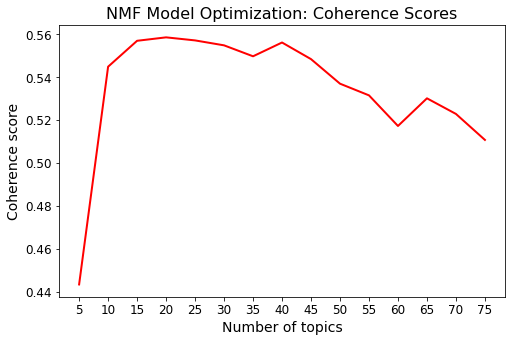

In [18]:
nmf_coherence_scores(text_l, min_df, max_df)

It looks like 20 topics gives the highest coherence score with 15 and 25 being close.

I also ran the model with 15, 20, and 25 topics and it looks like 20 topics is the best iteration.

## k-means clustering

I will now try clustering of the document-term matrix obtained with TFIDF vectorization.

/Users/sunnajo/metis/onl20_ds4/projects/project4/topic_modeling.py:433: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


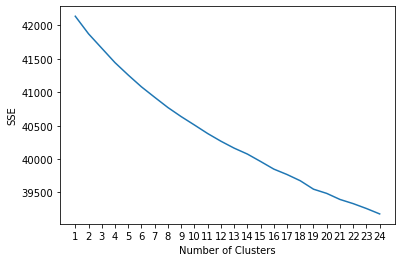

In [117]:
# Determine optimal number of clusters
kmeans_clusters(max_clusters=25, dtm=dtm_tfidf)

There is a possible elbow at 19 clusters.

I will also try clustering of the topics obtained from NMF with TFIDF vectorization to see if there are any interesting patterns.

/Users/sunnajo/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/sunnajo/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/sunnajo/metis/onl20_ds4/projects/project4/topic_modeling.py:465: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


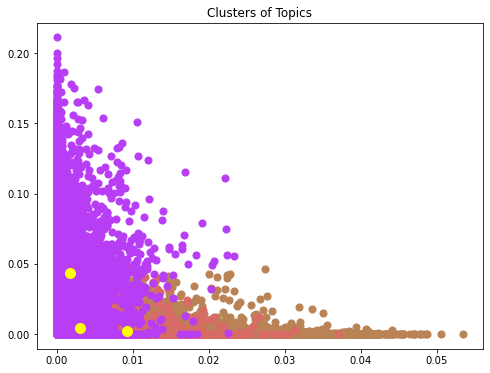

In [119]:
# 3 clusters
kmeans(doc_topic_tfidf, n_clusters=3)

/Users/sunnajo/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/sunnajo/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/sunnajo/metis/onl20_ds4/projects/project4/topic_modeling.py:465: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


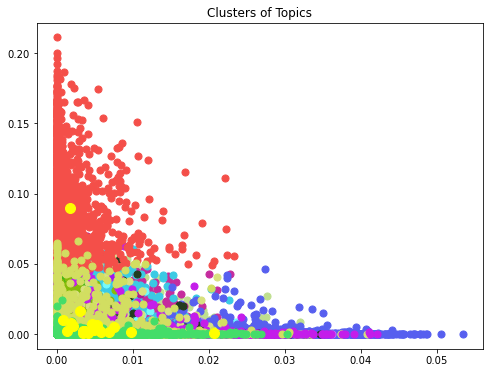

In [120]:
# 20 clusters
kmeans(doc_topic_tfidf, n_clusters=20)

It looks like the topics are more separable.

#### Summary:
We have tried various methods of topic modeling and clustering. It looks like NMF with TFIDF vectorization will be the best approach for topic modeling.